<div align="center">

# Prédiction de la souscription d'un dépôt à terme  

## Exploration des données

<img src="https://raw.githubusercontent.com/komiadok/bank_client_segmentation/main/cover_image.jpg" alt="Segmentation de clients bancaires" width="500"/>

</div>

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
📚 Chargement des librairies
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🗃️ Partie 1 : Importation des données
</div>

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
print(f'Taille du dataframe : {data.shape}')

Taille du dataframe : (41188, 21)


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🔍 Partie 2 : Résumé des données
</div>

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Interprétation

1. **age**

   La campagne de l’institution bancaire portugaise s’adresse à un large éventail d’âges, allant de 17 à 98 ans. Avec une moyenne d’âge de 40 ans et une médiane à 38 ans, la majorité des personnes contactées sont en âge de travailler. Il conviendra cependant de porter une attention particulière aux clients âgés de 17 ans, car étant mineurs, ils doivent faire l’objet de contrôles légaux et éthiques lors de la prospection.

2. **duration**

    La durée des appels est très dispersée. Il y a des appels très courts (moins d'une minute) et quelques appels très longs (plus d'une heure). Il y a la présence de durées nulles, qui sont probablement des appels manqués ou non aboutis. La durée de la majorité des appels se situe dans une fourchette raisonnable (2-5 minutes), ce qui est commun pour un appel de campagne marketing. Cependant, il faudra s'intéresser aux appels très longs (4918 secondes). C'est des cas extrêmement rares. Il peut s'agir d'erreurs de mesure.

3. **campaign**

    La plupart des clients sont contactés 1 à 3 fois, mais il existe quelques cas extrêmes avec plus de 10, voire 50 contacts. Le maximum à 56 appels est très élevé, cela peut nuire à l'image de la banque, et réduire l'efficacité des appels. Il faudra porter un regard attentif sur ce cas, afin d'analyser si ce n'est pas une erreur de mesure.

4. **pdays**

    La majorité des clients n'ont pas été contacté auparavant lors d'une campagne marketing. Le 25e percentile, la médiane et le 75e percentile à 999 chacun atteste cela. Cela suggère que la banque cible principalement de nouveaux clients lors de cette campagne.

5. **emp.var.rate** (indicateur trimestriel)

     Bien que la moyenne soit proche de zéro, la médiane à 1.1 et le 75e percentile à 1.4 montrent que la majorité des appels ont été effectués dans des périodes de croissance de l'emploi. Cependant, le minimum à 3.4 et le 25e percentile à 1.8 suggèrent que 25% des appels ont été effectués dans des conditions économiques très difficiles, ce qui peut avoir un impact fort sur la réceptivité du client à une offre bancaire.

   Une variation de l’emploi comprise entre -3,4 % et +1,4 % entre mai 2008 et novembre 2010 s’explique par le contexte macroéconomique de la Grande Récession et ses suites immédiates, marquées notamment par la chute massive des marchés boursiers et la faillite de Lehman Brothers en septembre 2008. La baisse initiale résulte donc de la récession profonde et des faillites sectorielles, tandis que la reprise partielle observée en 2009-2010 traduit l’amélioration progressive de la conjoncture.

7. **cons.price.idx** (indicateur mensuel)

    La faible variabilité (0.58) montre que les campagnes ont été menées dans un contexte de prix globalement stable, sans pic d'inflation majeur. La médiane (93.75) est légèrement supérieure à la moyenne (93.57), ce qui peut indiquer une légère asymétrie négative. Nous avons donc quelques périodes avec des prix plus faibles.

8. **cons.conf.idx** (indicateur mensuel)

    La confiance des consommateurs est toujours négative dans ce dataset, ce qui signifie que sur toute la période étudiée, les clients perçoivent l'économie plutôt défavorablement. L'écart-type à 4.63 montre que la confiance varie, avec des périodes où le morale est un peu meilleur (vers -27) et d'autres où il est très bas (près de -51). Ce type de climat peut réduire la propension des clients à souscrire à des produits bancaires.

9. **euribor3m** 

    La médiane (4.86) et le 75e percentile (4.96) sont très proches du maximum (5.05), tandis que la moyenne (3.62) est tirée vers le bas par des valeurs basses (minimum à 0.63), cela indique que la majorité des observations sont concentrées sur des taux élevés, mais quelques valeurs basses font baisser la moyenne. La banque a conduit ses campagnes dans une période où les taux d'intérêt à court terme (Euribor 3 mois) étaient souvent élevés, ce qui peut affecter la décision des clients de souscrire à un crédit ou produit lié aux taux.

   La forte variation du taux Euribor observée trouve son origine dans la Grande Récession de 2008 aux États-Unis. En effet, à la suite de la crise financière, le taux a connu une chute marquée, se stabilisant autour de 0 %. L’augmentation progressive jusqu’à atteindre environ 5 % correspond aux phases de reprise économique. Cette évolution s’inscrit donc dans une dynamique conjoncturelle normale.

In [7]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Interprétation

1. **job**

    La profession est souvent très liée aux comportements financiers. Elle est donc pertinente pour prédire la souscription à un produit bancaire. Nous avons 12 professions différentes parmi les clients prospectés. La modalité **admin** qui fait référence à **administratif** est surreprésentée dans notre jeu de données. Plus d'un quart des clients prospectés exercent ce type de profession. Il faudra y prêter un oeil attentif car, cette variable peut fortement influencer le modèle.
   
2. **marital**
    
    Nous avons 4 status maritaux différents parmi les clients prospectés. Plus de 60% des clients ont déclaré être mariés. Cette variable peut potentiellement influencer la souscription. Les personnes célibataires ou divorcées peuvent avoir des comportements financiers différents des mariés. La surreprésentation de la modalité **married** peut introduire un biais, il faut donc vérifier si ce groupe a un taux de souscription élevé ou faible.
    
3. **default**

    3 modalités différentes sont présentes pour cette variable (probablement yes, no, unknown). La majorité des clients prospectés n'ont pas de crédit en défaut. En effet, la modalité **no** est présente chez plus de 79% des prospects. Cette variable est potentiellement pertinente pour la prédiction. Avoir un crédit en défaut peut être un indicateur de risque, et donc influencer la probabilité de souscription (la banque pourrait refuser ou restreindre les offres et le client peut être moins confiant et moins intéressé).

4. **housing**

    Environ 52% des prospects indiquent avoir un prêt locatif. Ce qui peut impacter le comportement d'épargne. Un client déjà engagé dans un prêt immobilier pourrait être moins enclin à souscrire un autre produit.

5. **contact**

    Le moyen de communication le plus fréquent chez les prospects reste le téléphone portable. Cette variable est intéressante et pourrait être incluse dans dans la prédiction. Elle peut influencer la probabilité de réussite de la campagne, car certains moyens sont plus efficaces que d'autres pour joindre ou convaincre les clients.

6. **month**

    La campagne s'est déroulée de mai 2008 à novembre 2010. Nous observons que 10 mois distincts sont représentés malgré que l'année compte 12 mois. Cela signifie simplement que certaines périodes ou mois ont été définis pour contacter les prospects. Parmi ces mois, le mois de mai est le plus fréquent et représente environ 33% des contacts effectués. Certains mois peuvent connaître moins d'activité (été, fin d'année), ce qui peut influencer le taux de souscription.

7. **day_of_week**

    Les contacts ont eu lieu sur 5 jours de la semaine, probablement du lundi au vendredi. Le jeudi se révèle comme le jour le plus fréquent où les prospects ont été contactés (environ 20% des contacts). Le jour de contact peut en effet influencer la réceptivité du client : les jeudis ou mardis peuvent être plus efficaces que les lundis ou vendredis. 

8. **poutcome**

    Cette colonne représente l'issue de la dernière campagne marketing. La modalité **nonexistent** indique simplement que le client n'a jamais été contacté auparavant. Cette modalité est la plus fréquente. Elle nous indique que 86% des prospects n'ont jamais participé à une campagne marketing de l'institution bancaire. Nous avons déjà relevé que la campagne cible principalement les nouveaux clients. Ce qui est à peu près normal.
    
9. **y**

    Il s'agit de la variable d'intérêt de notre analyse. Elle indique si le client a souscrit à un dépôt à terme (produit bancaire à échéance fixe) à la suite de la dernière campagne marketing. Nous remarquons que 88.7% des clients n'ont pas souscrit. Il y a donc une forte majorité de refus qui crée un déséquilibre. Ce qui peut être embêtant pour notre prédiction.

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
⚠️ Partie 3 : Qualité des données
</div>

### Données manquantes

Le jeu de données ne présente pas de valeurs manquantes classiques telles que NaN, None, null ou NA. Toutefois, certaines modalités comme **"unknown"** peuvent indiquer une absence de réponse. Nous allons donc vérifier leur présence et éventuellement celle d'autres formes implicites de valeurs manquantes, telles que : **"N/A", "NA", "null", "None", un espace vide (" "), ou encore une tabulation ("\t")**.

In [8]:
def detect_missing_data(df, valeurs_manquantes):
    """
    Description:
        Analyse un DataFrame pour détecter les données manquantes
            Initialise un DataFrame du même format que df, rempli de False
            Sélectionne les colonnes de type object
            Parcoure les colonnes du Dataframe et détecte les valeurs manquantes 
            Retourne True pour chaque valeur manquante détectée

    Arguments:
        df : DataFrame
        valeurs_manquantes : liste des valeurs manquantes définies
    
    Retourne:
        Le DataFrame créé contenant True pour les cellules considérées comme manquantes, False sinon 
    """
    
    # Initialiser le masque avec False (crée un dataframe de même taille que df rempli initialement à False)
    masque = pd.DataFrame(False, index=df.index, columns=df.columns)

    # Filtrer uniquement les colonnes de type object (texte)
    colonnes_object = df.select_dtypes(include='object').columns

    # Parcourir chaque colonne de type object du dataframe
    for col in colonnes_object:
        series_str = df[col].astype(str).str.strip().str.lower() # conversion en minuscules
        masque[col] = (
            series_str.isin(valeurs_manquantes) |  # valeurs personnalisées définies
            series_str.str.match(r'^\s*$')          # chaînes vides ou blancs
        )
    return masque # retourner un dataframe avec True pour toutes les valeurs manquantes et False sinon

In [9]:
# Définir les valeurs considérées comme "manquantes" explicites
missing_values = ['nan', "n/a", "na", "none", "null", "unknown"]

# Appliquer la fonction
missing_values = detect_missing_data(data, missing_values)

# Calcul du nombre de valeurs manquantes par colonne
missing_summary = missing_values.sum()  

# Garder uniquement les colonnes avec au moins une valeur manquante
missing_summary = missing_summary[missing_summary > 0]

# Création du DataFrame missing_summary
missing_summary = missing_summary.reset_index()
missing_summary.columns = ['variable', 'missing_count']

# Ajout du taux de valeurs manquantes
missing_summary['missing_rate'] = (missing_summary['missing_count'] / len(data)).round(4)
missing_summary.sort_values(by='missing_rate', ascending=False).reset_index(drop=True)

,variable,missing_count,missing_rate
0,default,8597,0.2087
1,education,1731,0.0420
2,housing,990,0.0240
3,loan,990,0.0240
4,job,330,0.0080
5,marital,80,0.0019


#### Interprétation

Nous avons identifié la présence de données manquantes dans six variables de notre jeu de données, notamment : 
* `default` : 8 597 
* `education` : 1 731
* `housing` : 990
* `loan` : 990
* `job` : 330
* `marital` : 80

La variable `default` qui indique si l'individu a un défaut de paiement sur un crédit, est celle qui affiche la complétude la plus basse avec un taux de données manquantes à **20.87%**. Elle est suivie par la variable `education` (**4.20%**) qui fait référence au niveau d'éducation de l'individu. La variable `marital`, référence à la situation matrimoniale de l'individu se distingue positivement avec le plus faible taux de données manquantes (**0.19%**).

Nous allons analyser ces variables afin d’identifier les différentes formes que prennent les données manquantes (par exemple : **"n/a", "na", "null", "none", "unknown", etc.**) et leur impact sur la souscription à un dépôt à terme. Cette analyse nous permettra de connaître le mode de traitement adapté à ces données.

#### Analyse des variables

In [10]:
def analyze_variable_with_missing_data (df, variable, cible='y', valeur_positive='yes'):
    """
    Description: 
        Analyse une variable catégorielle croisée avec la variable target (souscription à un dépôt à terme)
            Calcule l'effectif total par modalité
            Calcule le taux de souscription de dépôt à terme (y = yes)
            Calcule la moyenne pondérée des taux

    Arguments:
        df : DataFrame
        variable : Nom de la colonne à analyser
        cible : Nom de la colonne target (souscription) qui sera utilisée pour le croisement
        valeur_positive : valeur de la colonne target à étudier (yes pour souscription)
        
    Retourne:
    - Un DataFrame des résultats triés par taux décroissant
    - La moyenne pondérée (float)
    """
    
    grouped = df.groupby(variable).agg(
        effectif=(cible, 'count'),
        nb_oui=(cible, lambda x: (x == valeur_positive).sum())
    )
    
    grouped['taux'] = (grouped['nb_oui'] / grouped['effectif']).round(4)
    
    # Calcul de la moyenne pondérée
    moyenne_ponderee = (
        (grouped['taux'] * grouped['effectif']).sum() / grouped['effectif'].sum()
    )
    
    print(f"📌 Le taux moyen de souscription pour '{variable}' : {moyenne_ponderee:.4f}")
    
    return grouped.sort_values(by='taux', ascending=False), moyenne_ponderee

##### default

In [11]:
# Appliquer la fonction
grouped_default, mean_default = analyze_variable_with_missing_data(data, 'default')
grouped_default

📌 Le taux moyen de souscription pour 'default' : 0.1127


,effectif,nb_oui,taux
default,,,
no,32588,4197,0.1288
unknown,8597,443,0.0515
yes,3,0,0.0000


**Observation**

* La modalité `no` est très majoritaire et présente un taux de souscription supérieur à la moyenne (**11.27%**). C'est donc une modalité **porteuse** d'information.
* La modalité `unknown` a un volume important de données mais présente un taux de souscription très inférieur (**5.15%**) à la moyenne. Cette modalité semble **informative, différenciante**, bien qu'elle désigne une **valeur manquante explicite**.
* La modalité `yes` a un effectif extrêmement faible et ne présente aucun cas de souscription. Elle n'est donc **pas statistiquement significative**. Elle est **peu fiable pour le modèle**, risque d'**overfitting**.

**Conclusion**

Au vu de ces observations, il n'est pas pertinent de garder la modalité `yes` dans le modèle. Il est recommandé de la supprimer.<br>
Cependant, la modalité `unknown` devrait être conserver car, elle est fréquente et est associée à un comportement spécifique (taux bien plus bas).

##### education

In [12]:
grouped_education, mean_education = analyze_variable_with_missing_data(data, 'education')
grouped_education

📌 Le taux moyen de souscription pour 'education' : 0.1126


,effectif,nb_oui,taux
education,,,
illiterate,18,4,0.2222
unknown,1731,251,0.1450
university.degree,12168,1670,0.1372
professional.course,5243,595,0.1135
high.school,9515,1031,0.1084
basic.4y,4176,428,0.1025
basic.6y,2292,188,0.0820
basic.9y,6045,473,0.0782


**Observation**

* La modalité `illiterate` a un très faible effectif mais un taux de souscription très élevé (**22.22%**), largement supérieur au taux moyen (**11.26%**). 
* La modalité `unknown` a un effectif non négligeable et un taux de souscription (**14.50**) significativement au-dessus de la moyenne.
* La modalité `university.degree` est présente chez **12 168** clients prospectés. Elle affiche un taux de souscription de **13.72%**, supérieur également à la moyenne.
* La modalité `professional.course` a un volume important de données et affiche un taux de souscription (**11.35%**) légèrement supérieur à la moyenne.

Ces modalités sont **porteuses d'information positive sur la propension à souscrire**.

* La modalité `high.school` est assez fréquente chez les clients, mais affiche un taux de souscription (**10.84%**) inférieur à la moyenne.
* Les modalités `basic.4y`, `basic.6y` et `basic.9y` ont des effectifs non négligeables, et présentent respectivement des taux de souscription de **10.25%**, **8.20%** et **7.82%**. Ces taux sont nettement inférieurs à la moyenne.

Ces modalités sont **associées à une propension plus faible à souscrire**.

**Conclusion**

Les taux de souscription varient fortement d'une modalité à l'autre. De plus, il n'y a pas de modalité extrêmement rare hormis `illiterate`. L'information prédictive est assez forte.<br>
La modalité `illiterate` est très faible en volume pour être fiable statistiquement. Son taux de souscription élevé peut relever d'un effet du hasard. Il peut être judicieux de **supprimer ses lignes** ou de les **conserver comme tel** en définissant un flag pour la rareté de cette modalité, ou de la **fusionner avec une catégorie voisine** si logique métier.<br>
La modalité `unknown` devrait être conservée en tant que **modalité à part entière**, car elle est **informative**.<br>
Il faudrait éviter de regrouper les modalités `basic.*` car leurs taux varient énormément entre elles. Leur regroupement diluerait l'information.

##### housing

In [13]:
grouped_housing, mean_housing = analyze_variable_with_missing_data(data, 'housing')
grouped_housing

📌 Le taux moyen de souscription pour 'housing' : 0.1127


,effectif,nb_oui,taux
housing,,,
yes,21576,2507,0.1162
no,18622,2026,0.1088
unknown,990,107,0.1081


**Observation**

* La modalité `yes` a un grand effectif et présente un taux de souscription (**11.62%**) légèrement supérieur à la moyenne.
* La modalité `no` possède un large volume de données également, avec un taux de souscription (**10.88%**) légèrement inférieur à la moyenne.
  
Ces deux modalités sont informatives.

* La modalité `unknown` a un effectif modéré, mais a un taux de souscription très proche de la modalité `no`. Cette modalité n'est pas dominante, mais elle est non négligeable.

**Conclusion**

Il est pertinent de conserver les trois modalités.

##### loan

In [14]:
grouped_loan, mean_loan = analyze_variable_with_missing_data(data, 'loan')
grouped_loan

📌 Le taux moyen de souscription pour 'loan' : 0.1127


,effectif,nb_oui,taux
loan,,,
no,33950,3850,0.1134
yes,6248,683,0.1093
unknown,990,107,0.1081


**Observation**

* La modalité `no` a un effectif majoritaire (**informative**), et présente un taux de souscription (**11.34%**) très proche du taux moyen (**11.27%**).
* La modalité `yes` a un effectif non négligeable, avec un taux (**10.93%**) légèrement en dessous du taux moyen.
* La modalité `unknown` a un effectif modéré, et un taux assez proche (**10.81%**) du taux moyen même si légèrement en-dessous.

**Conclusion**

Les trois modalités ont des taux similaires, avec de **légères variations**, mais **aucune rupture statistique majeure**. La modalité `unknown` est proche de la modalité `yes` mais doit rester distinct pour **préserver l'information** sur la nature incomplète de la donnée. Il est donc judicieux de conserver les trois modalités.

##### job

In [15]:
grouped_job, mean_job = analyze_variable_with_missing_data(data, 'job')
grouped_job

📌 Le taux moyen de souscription pour 'job' : 0.1126


,effectif,nb_oui,taux
job,,,
student,875,275,0.3143
retired,1720,434,0.2523
unemployed,1014,144,0.1420
admin.,10422,1352,0.1297
management,2924,328,0.1122
unknown,330,37,0.1121
technician,6743,730,0.1083
self-employed,1421,149,0.1049
housemaid,1060,106,0.1000


**Observation**

* Les modalités `student` et `retired` montrent un **comportement très différenciant**. Elles présentent des taux de souscription (`student` : 31.43%, `retired` : 25.23%) largement au-dessus du taux moyen (**11.26%**).
* La modalité `unemployed` présente également un taux de souscription (**14.20%**) nettement au-dessus du taux moyen.
* Les modalités `admin.`, `management` et `unknown` ont respectivement des taux de souscription à **12.97%**, **11.22%** et **11.21%** proches de la moyenne (**11.26%**).
* Les modalités `technician`, `self-employed`, `housemaid`, `entrepreneur`, `services` et `blue_collar` présentent tous des taux de souscription inférieurs à la moyenne.

**Conclusion**

Il est recommandé de ne pas regrouper les modalités à fort signal comme `student` et `retired`.<br>
La modalité `unknown` doit être conservée pour éviter le risque de dilution du signal et les biais.<br>
Les modalités avec des taux proches de la moyenne doivent être également conservées.<br>
Enfin, il peut être intéressant de conserver les modalités avec des taux de souscription inférieurs à la moyenne, puis de les regrouper si besoin dans un second temps.

##### marital

In [16]:
grouped_marital, mean_marital = analyze_variable_with_missing_data(data, 'marital')
grouped_marital

📌 Le taux moyen de souscription pour 'marital' : 0.1127


,effectif,nb_oui,taux
marital,,,
unknown,80,12,0.1500
single,11568,1620,0.1400
divorced,4612,476,0.1032
married,24928,2532,0.1016


**Observation**

* La modalité `unknown` a un taux de souscription élevé (**15%**), mais un effectif faible. Sa fiabilité statistique n'est donc pas prouvée.
* La modalité `single` a un effectif important et un taux supérieur (**14%**) au taux moyen (**11.27%**). Ces profils sont **potentiellement plus réceptifs** aux campagnes de souscription.
* Les modalités `divorced` et `married` présentent des taux de souscription en dessous de la moyenne (`divorced` : 10.32%, `married` : 10.16%).

**Conclusion**

La modalité `unknown` doit être conservée, car son effectif est trop faible pour conclure sur une similarité conduisant à un regroupement.<br>
Les autres modalités devront être conservées également car elles sont **informatives** et seront **potentiellement utiles** au ciblage. Par exemple, nous savons que les personnes célibataires souscrivent davantage que les personnes mariées ou divorcées.

#### Export des données manquantes

In [17]:
# Création d'une copie du dataframe
data_explor = data.copy()

# Ajout de la colonne is_missing au DataFrame qui indique si l'observation contient une donnée manquante 
data_explor['is_missing'] = missing_values.any(axis=1)

# Filtre sur les données manquantes
missing_data = data_explor[data_explor['is_missing']==True]

# Export des données manquantes dans un fichier csv
missing_data.to_csv("outputs/missing_data.csv", index=False)

### Données aberrantes

#### Vérification de la validité des mois et jours

In [18]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [19]:
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

**Conclusion**

* La variable `month` qui correspond au mois où le client a été contacté contient dix modalités : **mar, apr, may, jun, jul, aug, sep, oct, nov, dec**. Ces modalités sont bien équivalentes aux mois de l'année civile. 
* La variable `day_of_week` qui correspond au jour où le client a été contacté contient cinq modalités : **mon, tue, wed, thu, fri**. Ces modalités correspondent aux jours de la semaine.

#### Vérification des incohérences

In [20]:
data[(data['age'] < 18)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


**Observation**

Cinq individus de moins de 18 ans, donc mineurs sont présents dans le jeu de données. Deux parmi eux ont souscrit à un dépôt à terme. Cependant, juridiquement, les mineurs n'ont pas la capacité légale de signer seuls un contrat financier. Les dépôts à terme sont des engagements contractuels, soumis à des réglementations qui exigent un âge légal. Un mineur n'est donc pas en mesure d'y souscrire. Ils ne devraient même pas être ciblés dans le cadre de cette campagne.

**Conclusion**

Ces observations seront exclues du jeu de données pour la modélisation prédictive, afin de ne pas biaiser les résultats et de garantir la conformité réglementaire. 

In [21]:
# Création de la colonne inconsistent_age qui indique True si la souscription est liée à un mineur
data_explor['inconsistent_age'] = (data_explor['age'] < 18)
data_explor.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_missing,inconsistent_age
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False


In [22]:
# Filtre sur les incohérences
inconsistent_age = data_explor[data_explor['inconsistent_age'] == True]

# Export des incohérences dans un fichier csv
inconsistent_age.to_csv("outputs/inconsistent_age.csv", index=False)

#### Valeurs aberrantes

##### Visualisation avec Boxplots

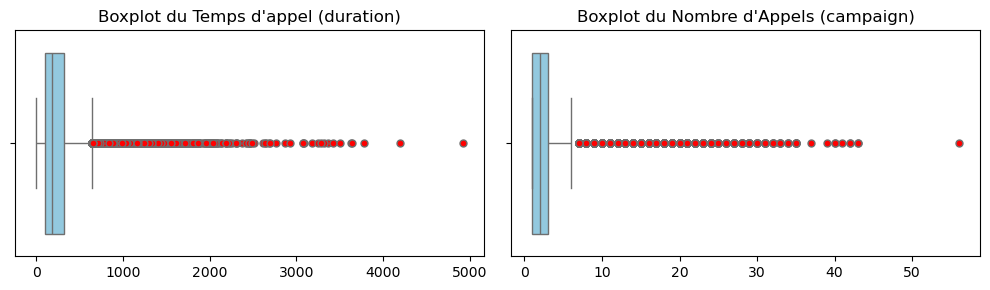

In [23]:
# Colonnes utilisées pour la visualisation
cols = ['duration', 'campaign']

# Titres des boxplots
titles = [
    "Boxplot du Temps d'appel (duration)",
    "Boxplot du Nombre d'Appels (campaign)",
]

# Création de la grille des boxplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes = axes.flatten() # Transformation en tableau 1D pour itération

# Paramètres d'affichage des outliers
flier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Génération des boxplots
for i, col in enumerate(cols):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue', flierprops=flier_props)
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_xlabel("")

# Ajustement de la mise en page
plt.tight_layout()
plt.show()

**Observation**

Lorsque nous observons les distributions à travers les boxplots, nous remarquons la présence de valeurs extrêmes pour les deux variables étudiées : `duration`et `campaign`.
* `duration` : certains enregistrements présentent des durées d'appel supérieures à 10 minutes, ce qui dépasse largement la norme observée et pourrait indiquer une erreur de saisie ou un cas atypique à investiguer.
* `campaign` : le nombre de contacts effectués pour un même client durant la campagne dépasse parfois 10, ce qui est anormalement élevé et pourrait refléter des pratiques exceptionnelles ou des anomalies dans l'enregistrement des données.

**Conclusion**

Nous allons donc analyser ces valeurs identifiées comme aberrantes afin de leur appliquer un traitement specifique qui permettra de préserver la qualité de la prédiction.

##### Visualisation avec Histogramme

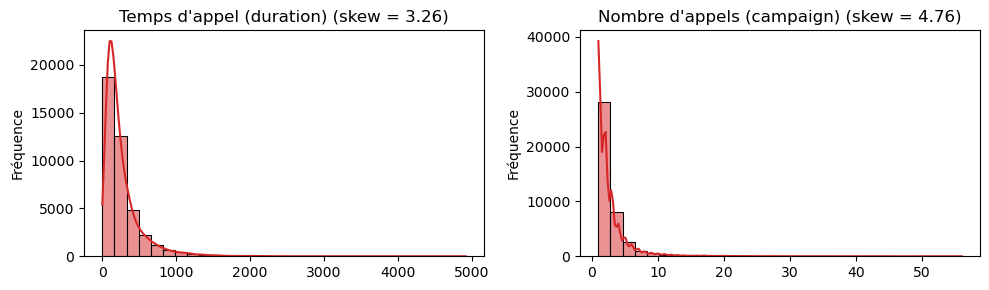

In [24]:
# Titres des histogrammes

titles = [
    "Temps d'appel (duration)",
    "Nombre d'appels (campaign)"
]

# Création de la grille des histogrammes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes = axes.flatten()  # Transformation en tableau 1D pour itération

# Génération des histogrammes
for i, col in enumerate(cols):
    sns.histplot(data[col].dropna(), bins=30, kde=True, color='#d62728', ax=axes[i])
    skew_val = data[col].skew()
    axes[i].set_title(f'{titles[i]} (skew = {skew_val:.2f})', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

**Observation**

Les histogrammes nous permettent d'observer des asymétries positives fortes sur les variables `duration` et `campaign`.
* `duration` présente une asymétrie positive forte (**3.26**). La majorité des observations sont concentrées sur des valeurs faibles, avec quelques très longues durées à droite.
* `campaign` présente une asymétrie positive encore plus prononcée proche de 5 (**4.76**) qui indique qu'une minorité d'observations a un nombre d'appels beaucoup plus élevé que la majorité.

**Conclusion**

Ces variables ont une distribution anormale et contiennent donc des valeurs extrêmes influentes. Pour déterminer nos valeurs aberrantes, les méthodes basées sur la moyenne et l'écart-type (**z-score classique**) ne seront pas adaptées, car elles supposent une distribution symétrique. <br>
Nous allons utiliser une approche beaucoup plus robuste qui n'est pas impactée par les valeurs extrêmes : la **méthode IQR**.

##### Méthode IQR

Nous utilisons la **méthode de Tukey modifiée** qui est une version améliorée de la méthode IQR plus adaptée pour les asymétries.<br>
Dans notre cas, la méthode IQR classique risque de détecter beaucoup d'outliers parce que la distribution est étalée d'un côté, alors que ces points pourraient être tout à fait normaux.

In [25]:
# Import de la fonction skew du module scipy.stats
from scipy.stats import skew

def tukey_modified_outliers(df, col):
    """
    Description:
        Détecte des valeurs aberrantes selon la méthode de Tukey ajustée pour asymétrie dans une colonne d'un DataFrame.
        Référence : Hubert & Vandervieren (2008) - Adjusted Boxplot for skewed distributions

    Arguments:
        df : DataFrame
        col : Nom de la colonne à analyser

    Retourne:
        pandas.series booléen de même taille que le DataFrame originel dans lequel True = outliers
    """

    # Suppresion des valeurs nulles
    series = df[col].dropna()
    
    # series = df[column]
    
    # Calcul du premier quartile (Q1), du troisième quartile (Q3) et de l'écart interquartile (IQR)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # Calcul du skewness (g1 de Fisher-Pearson)
    g1 = skew(series)
    
    # Facteur de correction pour asymétrie
    median_series = np.median(series)
    left_median = np.median(series[series < median_series]) if np.any(series < median_series) else median_series
    right_median = np.median(series[series > median_series]) if np.any(series > median_series) else median_series
    MC = (right_median - left_median) / IQR if IQR != 0 else 0 # éviter la division par zéro

    # Calcul du medcouple
    # x = np.sort(series) # series ne doit pas contenir de valeurs nulles
    # mc = medcouple(x)

    # Ajustement des bornes - Formules de Hubert & Vandervieren (2008) 
    if g1 >= 0:
        lower_fence = Q1 - 1.5 * np.exp(-4 * MC) * IQR
        upper_fence = Q3 + 1.5 * np.exp(3 * MC) * IQR
    else:
        lower_fence = Q1 - 1.5 * np.exp(-3 * MC) * IQR
        upper_fence = Q3 + 1.5 * np.exp(4 * MC) * IQR

    # Détection des outliers
    mask = (series < lower_fence) | (series > upper_fence)

    # Mettre les valeurs nulles à False
    mask = mask.fillna(False)

    # Afficher les bornes
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, \nskewness: {round(g1,2)}, \nMedcouple: {round(MC,4)}, \nBorne inférieure: {round(lower_fence,2)}, Borne supérieure: {round(upper_fence,2)}")
    
    return mask

In [26]:
outliers_duration = tukey_modified_outliers(data, 'duration')
print(f"{outliers_duration.sum()} données aberrantes sont observées dans la colonne **duration**.")

Q1: 102.0, Q3: 319.0, IQR: 217.0, 
skewness: 3.26, 
Medcouple: 1.0046, 
Borne inférieure: 96.15, Borne supérieure: 6947.85
9451 données aberrantes sont observées dans la colonne **duration**.


In [27]:
outliers_campaign = tukey_modified_outliers(data, 'campaign')
print(f"{outliers_campaign.sum()} données aberrantes sont observées dans la colonne **campaign**.")

Q1: 1.0, Q3: 3.0, IQR: 2.0, 
skewness: 4.76, 
Medcouple: 1.5, 
Borne inférieure: 0.99, Borne supérieure: 273.05
0 données aberrantes sont observées dans la colonne **campaign**.


**Observation**

* L’application de la méthode de Tukey modifiée sur la variable `duration` a permis d’identifier **9 451** observations comme aberrantes. La borne supérieure calculée est de **6 947 secondes**, soit près de 1 heure 55 minutes d’appel. Or, dans le contexte spécifique d’une campagne marketing, les appels de prospection sont généralement attendus pour durer entre **60 et 180 secondes**, car leur objectif principal est de présenter rapidement l’offre et de vérifier l’intérêt du client. Cette différence importante entre le seuil statistique et la durée métier soulève la nécessité d’intégrer des règles métier complémentaires afin d’ajuster la détection des valeurs aberrantes.
* Concernant la variable `campaign`, les analyses statistiques ne révèlent pas de valeurs aberrantes, la borne supérieure étant estimée à **273** appels. Ce seuil est manifestement trop élevé au regard des pratiques métiers, où le nombre d’appels adressés à un même client dans le cadre d’une campagne marketing ne devrait pas dépasser **5**. Cette divergence confirme que les méthodes statistiques seules peuvent sous-estimer certains cas aberrants, notamment lorsque la distribution des données présente une large dispersion ou des valeurs extrêmes rares.

**Conclusion**

Les résultats soulignent l’importance de compléter les méthodes statistiques par des règles métier adaptées pour garantir une détection pertinente et opérationnelle des anomalies dans le cadre des campagnes marketing.

In [28]:
# Définition des seuils métier
duration_min = 0 # durée min acceptable en secondes
duration_max = 180  # durée max acceptable en secondes (3 min)
campaign_min = 1 # nombre min d'appels par campagne par client
campaign_max = 5  # nombre max d'appels par campagne par client

In [29]:
def flag_outliers_with_business_rules(df, col, lower_bound=None, upper_bound=None):
    """
    Description:
        Détecte des valeurs aberrantes en combinant des règles métier à la méthode de Tukey modifiée
        
    Arguments:
        df : DataFrame
        col : Nom de la colonne à analyser
        lower_bound : seuil min fixé par la règle métier
        upper_bound : seuil max fixé par la règle métier
    
    Retourne:
        DataFrame avec les valeurs aberrantes détectées selon les règles métier et la méthode de Tukey modifiée
    """

    # Récupération des valeurs aberrantes selon la méthode de Tukey modifiée 
    stat_mask = tukey_modified_outliers(df, col)

    # Suppresion des valeurs nulles
    series = df[col].dropna()

    # Détection des valeurs aberrantes selon les règles métier
    business_lower = (series < lower_bound) if lower_bound is not None else pd.Series(False, index=df.index)
    business_upper = (series > upper_bound) if upper_bound is not None else pd.Series(False, index=df.index)
    business_mask = business_lower | business_upper

    # Combinaison des valeurs aberrantes détectées statistiquement et avec les règles métier
    mask = stat_mask | business_mask

    return mask

In [30]:
outliers_duration = flag_outliers_with_business_rules(data, 'duration', duration_min, duration_max)
print(f"{outliers_duration.sum()} données aberrantes sont observées dans la colonne **duration**.")

Q1: 102.0, Q3: 319.0, IQR: 217.0, 
skewness: 3.26, 
Medcouple: 1.0046, 
Borne inférieure: 96.15, Borne supérieure: 6947.85
29934 données aberrantes sont observées dans la colonne **duration**.


In [31]:
outliers_campaign = flag_outliers_with_business_rules(data, 'campaign', campaign_min, campaign_max)
print(f"{outliers_campaign.sum()} données aberrantes sont observées dans la colonne **campaign**.")

Q1: 1.0, Q3: 3.0, IQR: 2.0, 
skewness: 4.76, 
Medcouple: 1.5, 
Borne inférieure: 0.99, Borne supérieure: 273.05
3385 données aberrantes sont observées dans la colonne **campaign**.


**Observation**

Suite à l'intégration des règles métier dans notre processus de détection des valeurs aberrantes, nous avons identifié : 
* **29 934** valeurs aberrantes pour la variable `duration`
* **3 385** pour la variable `campaign`.

**Conclusion**

Ce volume significatif de données atypiques nécessite une attention particulière. Ces valeurs excèdent largement les standards commerciaux en vigueur.<br>
Ces écarts significatifs peuvent traduire : 
* des cas particuliers de négociation approfondie ou de relance intensive.
* des erreurs de saisie ou anomalies de mesure dans les systèmes de suivi des appels.

Les volumes significatifs d'anomalies (près de **30 000** sur `duration`) justifient une analyse approfondie afin de déterminer les causes (processus internes, fiabilité des logs d'appels, double comptage). Ensuite, il faudra se pencher sur la stratégie de traitement la plus appropriée, en tenant compte des impacts potentiels sur la qualité et la fiabilité des analyses futures.

##### Export des valeurs aberrantes

In [32]:
# Ajout de la colonne is_outlier_duration au DataFrame qui indique si l'observation contient une donnée aberrante 
data_explor['is_outlier_duration'] = outliers_duration

# Ajout de la colonne is_outlier_campaign au DataFrame qui indique si l'observation contient une donnée aberrante 
data_explor['is_outlier_campaign'] = outliers_campaign

# Filtre sur les données aberrantes
outliers_data = data_explor[
    (data_explor['is_outlier_duration'] == True) |
    (data_explor['is_outlier_campaign'] == True)
]
# Export des données aberrantes dans un fichier csv
outliers_data.to_csv("outputs/outliers_data.csv", index=False)

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
📤 Partie 4 : Exportation de données
</div>

In [33]:
# Affichage de la table à exporter
data_explor.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_missing,inconsistent_age,is_outlier_duration,is_outlier_campaign
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,False,False,True,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,False,False,True,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,False,False,True,False


In [34]:
data_explor.to_csv("outputs/bank_dataset_explor.csv", index=False)

Nous procédons à l’exportation du DataFrame intégrant les colonnes indiquant la présence de données manquantes et de valeurs aberrantes identifiées lors de l’analyse.<br>
Ce DataFrame constitue la base de travail sur laquelle seront appliqués l’ensemble des traitements et transformations prévus dans le cadre du projet.